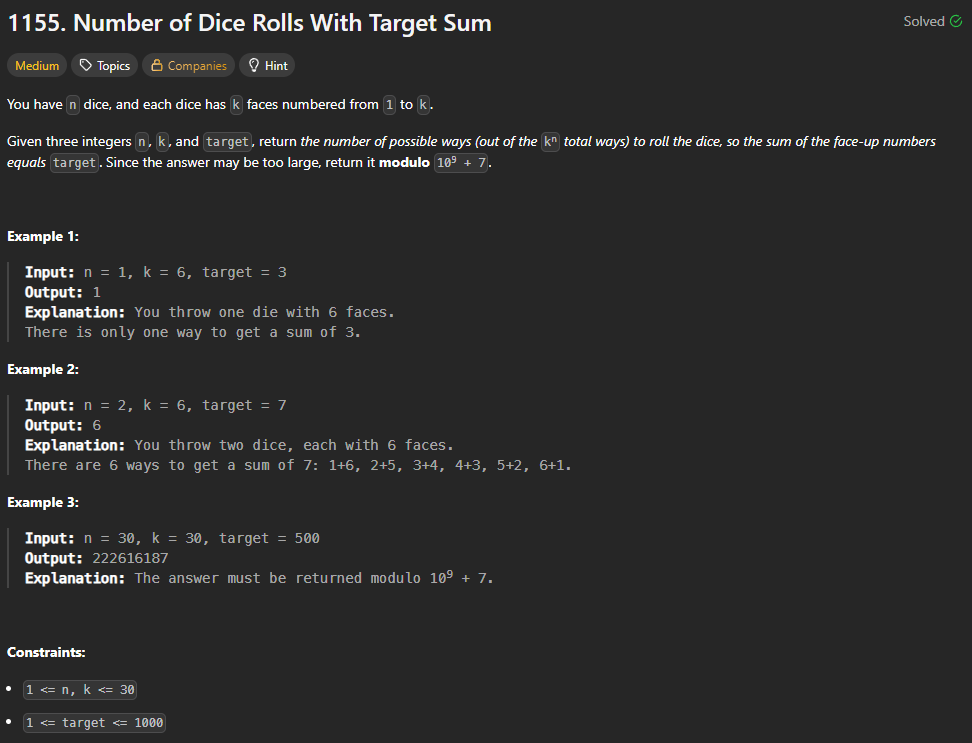

# Recursion

In [ ]:
class Solution:
    def numRollsToTarget(self, n: int, k: int, target: int) -> int:
        MOD = 10**9 + 7
        count = 0

        def helper(i=1, totalSum=0):
            nonlocal count

            if i > n:
                if totalSum == target:
                    count += 1
                return

            for j in range(1, k + 1):
                helper(i + 1, totalSum + j)

        helper()
        return count % MOD

# Memoization

In [ ]:
class Solution:
    def numRollsToTarget(self, n: int, k: int, target: int) -> int:
        MOD = 10**9 + 7
        memo = {}

        def helper(i, totalSum):
            if (i, totalSum) in memo:
                return memo[(i, totalSum)]

            if i == n:
                return 1 if totalSum == target else 0

            ways = 0
            for j in range(1, k + 1):
                if totalSum + j <= target:  # Prune invalid branches
                    ways += helper(i + 1, totalSum + j)
                    ways %= MOD

            memo[(i, totalSum)] = ways
            return ways

        return helper(0, 0)

# Dynamic Programming

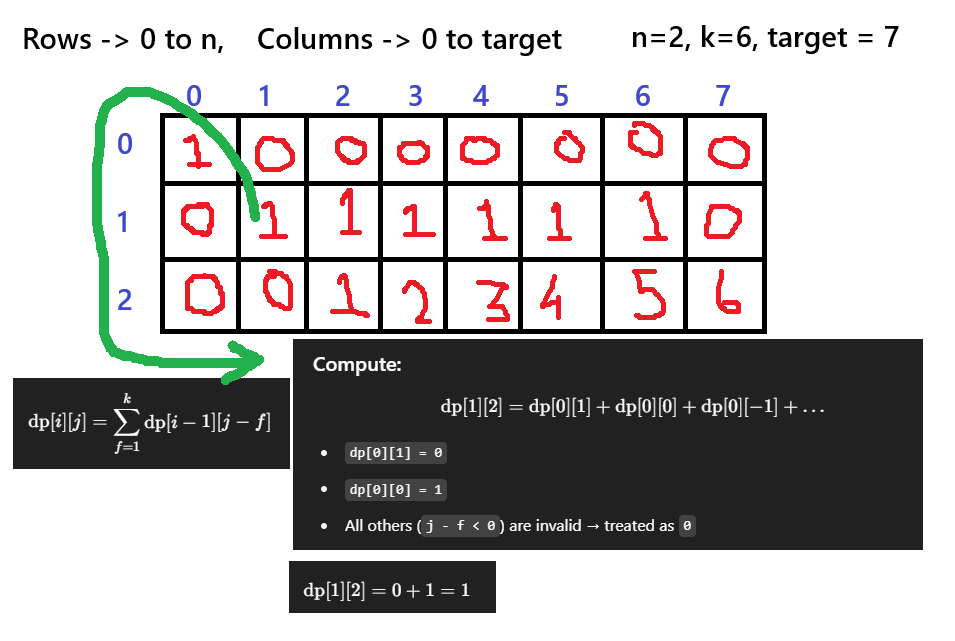

In [ ]:
class Solution:
    def numRollsToTarget(self, n: int, k: int, target: int) -> int:
        MOD = 10**9 + 7
        matrix = [[0 for _ in range(target + 1)] for _ in range(n + 1)]
        matrix[0][0] = 1

        for i in range(1, n + 1):
            for j in range(1, target + 1):
                sum_ = 0
                for f in range(1, k + 1):
                    if j - f >= 0:
                        sum_ = (sum_ + matrix[i - 1][j - f]) % MOD
                matrix[i][j] = sum_

        return matrix[n][target]
